# Train on Actual Tasks

In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 14.1 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00a 0:00:01


Epoch 1/10, Loss: 0.4647, Train Accuracy: 86.00%, Test Accuracy: 96.17%
Epoch 2/10, Loss: 0.1133, Train Accuracy: 96.66%, Test Accuracy: 97.37%
Epoch 3/10, Loss: 0.0786, Train Accuracy: 97.57%, Test Accuracy: 97.90%
Epoch 4/10, Loss: 0.0637, Train Accuracy: 98.01%, Test Accuracy: 98.23%
Epoch 5/10, Loss: 0.0538, Train Accuracy: 98.34%, Test Accuracy: 98.52%
Epoch 6/10, Loss: 0.0480, Train Accuracy: 98.52%, Test Accuracy: 98.59%
Epoch 7/10, Loss: 0.0424, Train Accuracy: 98.68%, Test Accuracy: 98.69%
Epoch 8/10, Loss: 0.0380, Train Accuracy: 98.79%, Test Accuracy: 98.51%
Epoch 9/10, Loss: 0.0355, Train Accuracy: 98.89%, Test Accuracy: 98.55%
Epoch 10/10, Loss: 0.0320, Train Accuracy: 99.02%, Test Accuracy: 98.84%
Epoch 1/10, Loss: 0.5241, Train Accuracy: 84.72%, Test Accuracy: 94.03%
Epoch 2/10, Loss: 0.1522, Train Accuracy: 95.36%, Test Accuracy: 96.58%
Epoch 3/10, Loss: 0.1066, Train Accuracy: 96.77%, Test Accuracy: 97.22%
Epoch 4/10, Loss: 0.0850, Train Accuracy: 97.34%, Test Accuracy

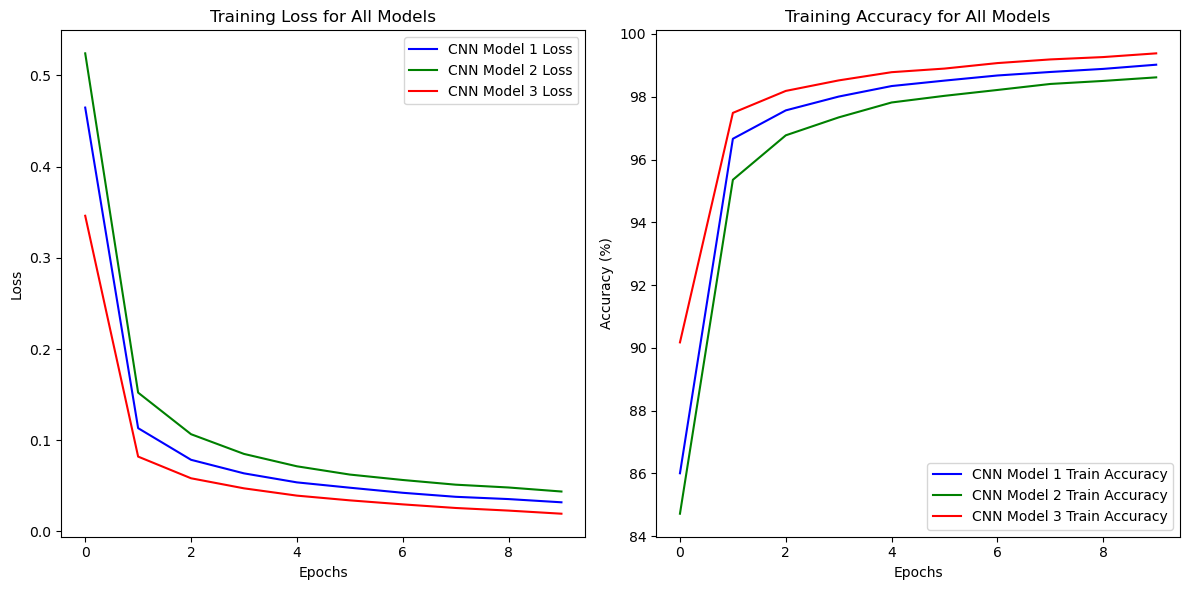

Final Test Accuracy for CNN Model 1: 98.84%
Final Test Accuracy for CNN Model 2: 98.41%
Final Test Accuracy for CNN Model 3: 98.80%


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 7 * 7, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(12 * 7 * 7, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class CNNModel3(nn.Module):
    def __init__(self):
        super(CNNModel3, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(12, 24, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(24 * 7 * 7, 48)
        self.fc2 = nn.Linear(48, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

def train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()
    train_losses, train_accuracies, test_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        train_losses.append(running_loss / len(train_loader))

        correct_test, total_test = 0, 0
        model.eval()
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_losses, train_accuracies, test_accuracies

def plot_combined_metrics(losses1, losses2, losses3, acc1, acc2, acc3):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(losses1, label="CNN Model 1 Loss", color='blue')
    plt.plot(losses2, label="CNN Model 2 Loss", color='green')
    plt.plot(losses3, label="CNN Model 3 Loss", color='red')
    plt.title('Training Loss for All Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc1, label="CNN Model 1 Train Accuracy", color='blue')
    plt.plot(acc2, label="CNN Model 2 Train Accuracy", color='green')
    plt.plot(acc3, label="CNN Model 3 Train Accuracy", color='red')
    plt.title('Training Accuracy for All Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

    cnn_model1 = CNNModel1()
    cnn1_train_losses, cnn1_train_accuracies, cnn1_test_accuracies = train_model(cnn_model1, train_loader, test_loader, epochs=10)

    cnn_model2 = CNNModel2()
    cnn2_train_losses, cnn2_train_accuracies, cnn2_test_accuracies = train_model(cnn_model2, train_loader, test_loader, epochs=10)

    cnn_model3 = CNNModel3()
    cnn3_train_losses, cnn3_train_accuracies, cnn3_test_accuracies = train_model(cnn_model3, train_loader, test_loader, epochs=10)

    plot_combined_metrics(cnn1_train_losses, cnn2_train_losses, cnn3_train_losses,
                          cnn1_train_accuracies, cnn2_train_accuracies, cnn3_train_accuracies)

    print(f'Final Test Accuracy for CNN Model 1: {cnn1_test_accuracies[-1]:.2f}%')
    print(f'Final Test Accuracy for CNN Model 2: {cnn2_test_accuracies[-1]:.2f}%')
    print(f'Final Test Accuracy for CNN Model 3: {cnn3_test_accuracies[-1]:.2f}%')